# Введение в глубинное обучение, ФКН ВШ

## Домашнее задание 1. Полносвязные нейронные сети. 

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
from IPython.display import clear_output
plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [8]:
import os

# Если винда, то соответствующая команда для закачки датасета
if os.name == 'nt':
    !curl -L "https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip" -o "data.txt.zip" -s
# В ином случае (linux, macos)
else:
    !wget  -O 'data.txt.zip' -q 'https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip'

In [2]:
df = pd.read_csv('data.txt.zip', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

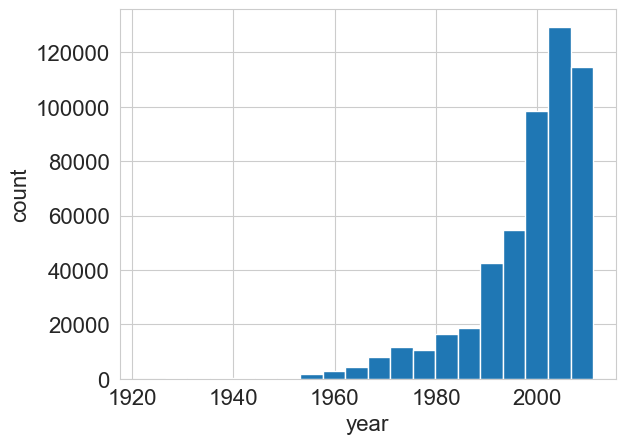

Range: 1922 - 2011
Unique values: 89


In [4]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, pred)

print(f'MSE для Ridge: {mse}')

MSE для Ridge: 89.74966397222073


In [7]:
y_mean_train = np.mean(y_train)
y_pred_constant = np.full_like(y_test, y_mean_train)

mse_constant = mean_squared_error(y_test, y_pred_constant)
print(f"MSE для константного прогноза: {mse_constant}")

MSE для константного прогноза: 117.83191164028968


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты. Можете также реализовать поддержку обучения на GPU, чтобы эксперименты считались быстрее. Бесплатно воспользоваться GPU можно на сервисах **Google Colab** и **Kaggle**.

In [9]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    '''
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    '''
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    '''
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    '''
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            with torch.no_grad():
                
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)

                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)
    
    if verbose:
        print(f'Validation MSE: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию c помощью [кросс-энтропийной функции потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-2`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Скорее всего вам пригодится `torch.utils.data.TensorDataset`. Когда будете конвертировать numpy-массивы в torch-тензоры, используйте тип `torch.float32`.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в TensorDataset, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением **логита**$^1$).

$^1$ **Логит** &mdash; выход последнего линейного слоя, может принимать любые вещественные значения. Если применить Softmax к логитам, то получатся вероятности распределения классов.

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [11]:
class Net(nn.Module):
    def __init__(self, num_features=90, num_classes=100, num_hidden=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(num_features, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, num_classes)
        )

    def forward(self, x):
        return self.net(x)

In [12]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)
y_train_enc = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_enc = encoder.transform(y_val.reshape(-1, 1))

In [13]:
from torch.utils.data import TensorDataset

n_classes = len(np.unique(y_train))
n_features = X_train.shape[1]
batch_size = 32

train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train_enc.flatten(), dtype=torch.long))
val_data = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val_enc.flatten(), dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, pin_memory=True)

In [14]:
net = Net(num_features=n_features, num_classes=n_classes, num_hidden=128).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)
metric = lambda logits, labels: torch.mean((logits.argmax(dim=1).float() - labels.float()) ** 2).item()

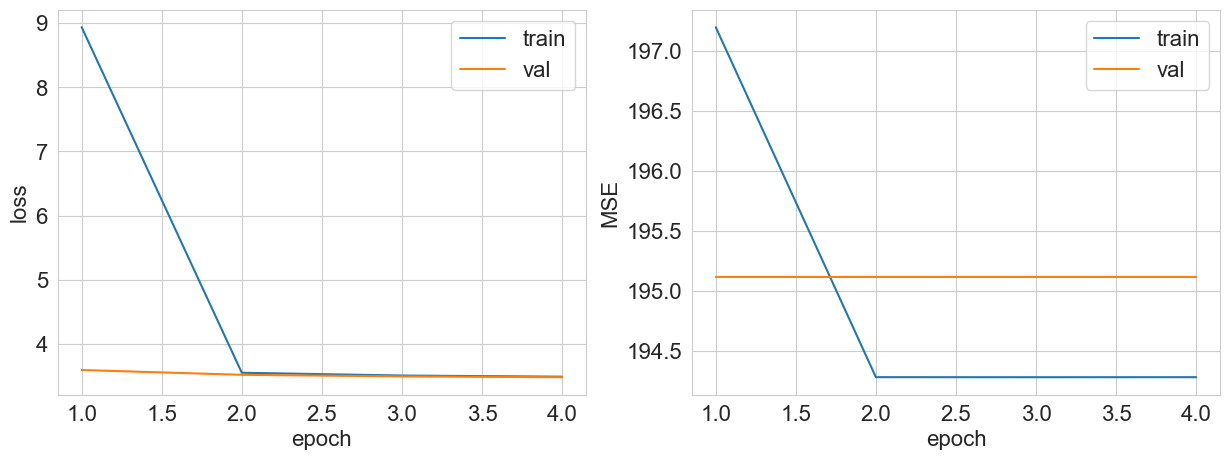

Validation MSE: 195.116


(194.28189498396725, 195.11615800958708)

In [15]:
num_epochs = 4

train_and_validate(
    net, 
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=1
)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Сначала ошибка упала, затем после 2 эпохи не изменялась, как и mse. Бейзлан не побит, mse оказалась на один порядок выше, чем у Ridge-регрессии. В данном случае лучше всего выбрать именно регрессию, чем классификатор, так как будет сильнее штрафоваться обучение, если есть существенные отклонения предсказанного от истинного. Классификация с использованием кросс-энтропийной функции потерь слабее штрафуется.

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в TensorDataset, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [16]:
from torch.utils.data import TensorDataset

n_classes = 1
n_features = X_train.shape[1]
batch_size = 32

train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32))
val_data = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32))

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, pin_memory=True)

In [17]:
from torch.nn.functional import mse_loss

net = Net(num_features=n_features, num_classes=n_classes, num_hidden=128).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-6)
metric = lambda logits, labels: mse_loss(logits, labels)

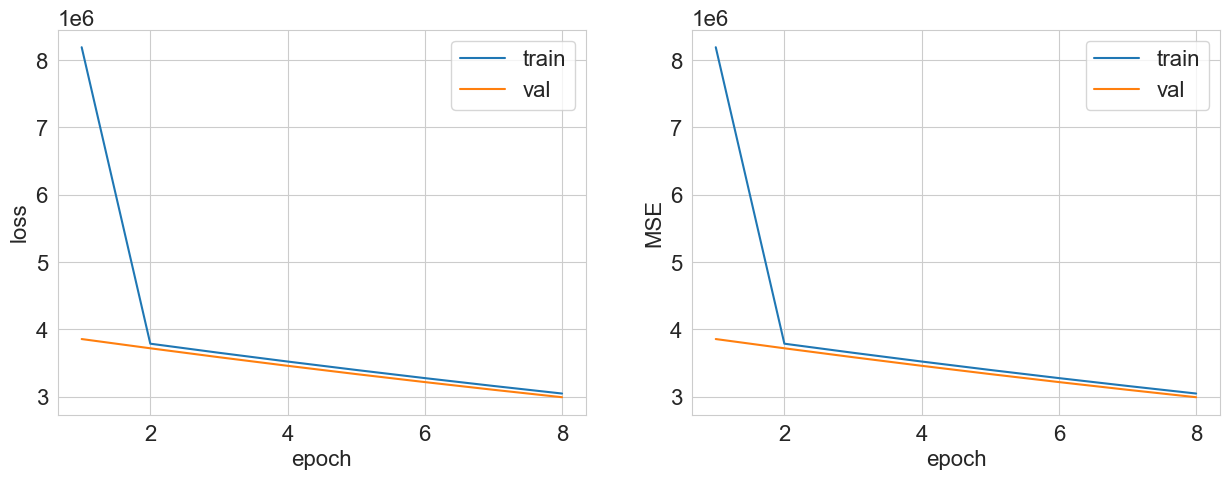

Validation MSE: 2992831.724


(3047711.9241102384, 2992831.724210107)

In [18]:
num_epochs = 8

train_and_validate(
    net, 
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=1
)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Обучение удалось стабилизировать при уменьшении lr до порядка -6 степени. При больших значениях lr ошибка уходила в бесконечность. При замене классификации на регрессию стало значительно хуже (в дальнейшем удастся стабилизировать обучение). Это происходит из-за больших величин признаков, за счет которых градиенты получаются большими и происходит взрыв градиентов, при этом целевая переменная не ограничена, и из-за этого она становится сильно большой.

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [19]:
min_value = min(y_train)
max_value = max(y_train)

In [20]:
def normalize(sample):
    '''
    Min-max normalization to convert sample to [0, 1] range
    '''
    normalized_sample = (sample - min_value) / (max_value - min_value)
    
    return normalized_sample

def denormalize(sample):
    '''
    Denormalize sample from [0, 1] to initial range
    '''
    denormalized_sample = sample * (max_value - min_value) + min_value
    
    return denormalized_sample

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим [сигмоидную активацию](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

In [21]:
y_train_norm = normalize(y_train)
y_val_norm = normalize(y_val)

In [64]:
class Net(nn.Module):
    def __init__(self, num_features, num_classes, num_hidden=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(num_features, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [23]:
n_classes = 1
n_features = X_train.shape[1]
batch_size = 32

train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train_norm.reshape(-1, 1), dtype=torch.float32))
val_data = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val_norm.reshape(-1, 1), dtype=torch.float32))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False, pin_memory=True)

In [24]:
# Функция для денормализации данных для получения правильного mse
def mse_denormalized(output, target):

    output_denorm = denormalize(output.detach().cpu().numpy())
    target_denorm = denormalize(target.detach().cpu().numpy())

    return np.mean((output_denorm - target_denorm)**2)

In [25]:
net = Net(num_features=n_features, num_classes=n_classes, num_hidden=128).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-6)
metric = mse_denormalized

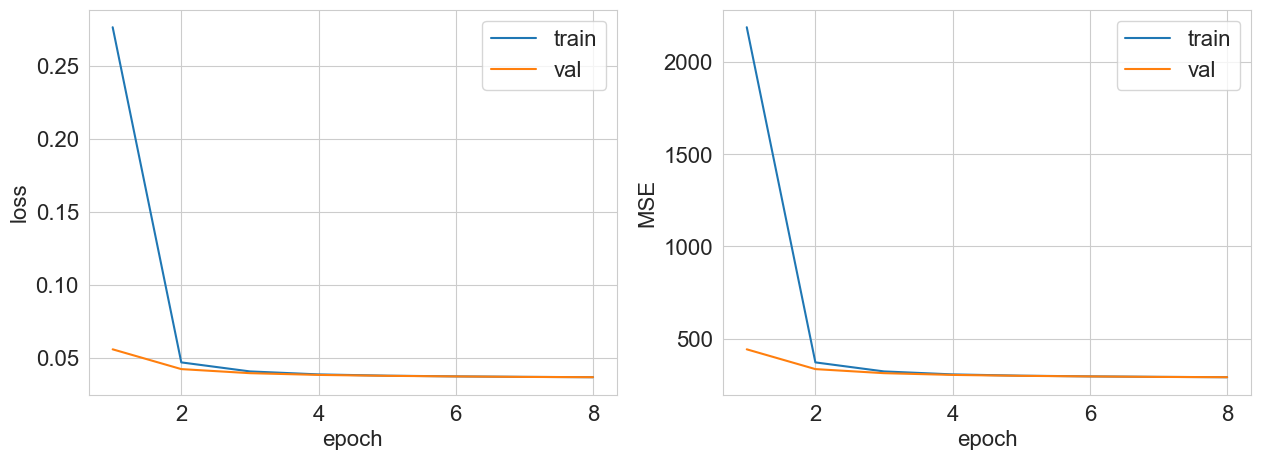

Validation MSE: 290.552


(290.3511402219441, 290.5517360455872)

In [26]:
num_epochs = 8

train_and_validate(
    net, 
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=1
)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** За счет нормализации целевой переменной удалось значительно уменьшить MSE и стабилизировать оубчение.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [28]:
train_data = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train_norm.reshape(-1, 1), dtype=torch.float32))
val_data = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32), torch.tensor(y_val_norm.reshape(-1, 1), dtype=torch.float32))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False, pin_memory=True)

In [29]:
net = Net(num_features=n_features, num_classes=n_classes, num_hidden=128).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)
metric = mse_denormalized

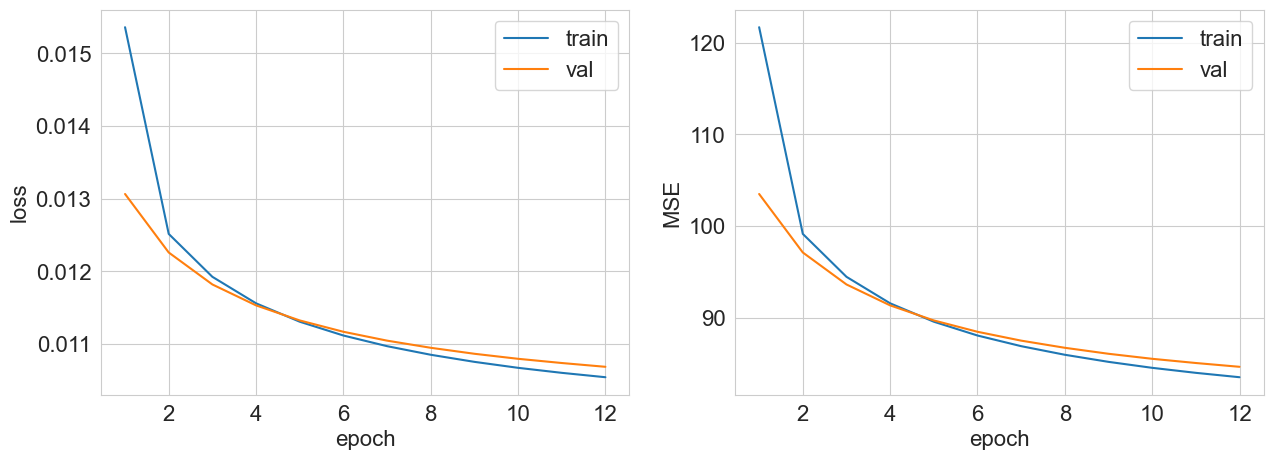

Validation MSE: 84.664


(83.52871742114176, 84.66399953370927)

In [30]:
num_epochs = 12

train_and_validate(
    net, 
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=1
)

Удалось получить результат, +- похожий на результат Ridge-регрессии (около 89,75), хотя и нужны были танцы с бубном)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть (5 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

**SGD+momentum**

In [38]:
net = Net(num_features=n_features, num_classes=n_classes, num_hidden=128).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, momentum=0.9)
metric = mse_denormalized

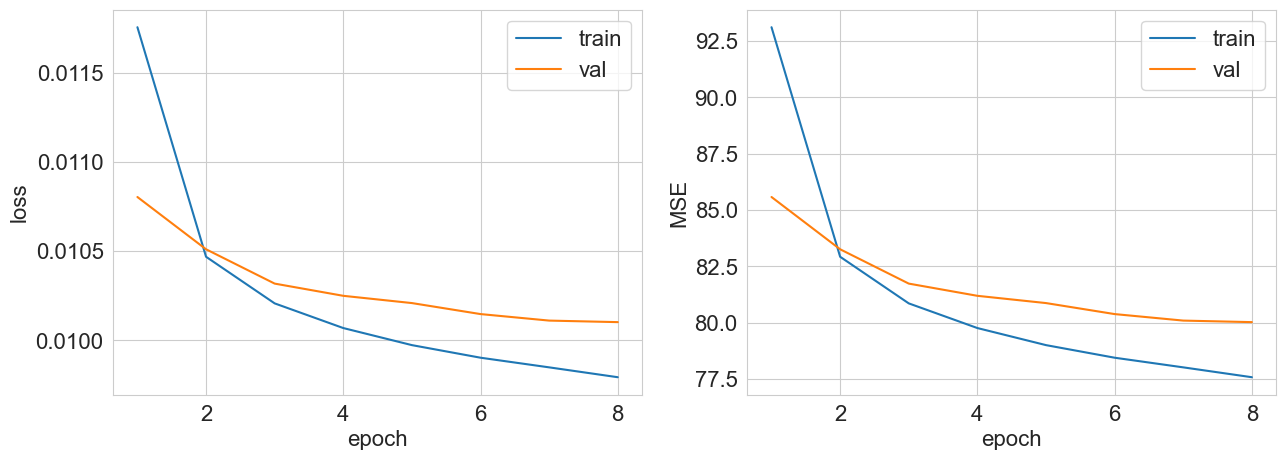

Validation MSE: 80.023


(77.5772088828725, 80.02256942050727)

In [39]:
num_epochs = 8

train_and_validate(
    net, 
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=1
)

**Adam**

In [40]:
net = Net(num_features=n_features, num_classes=n_classes, num_hidden=128).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
metric = mse_denormalized

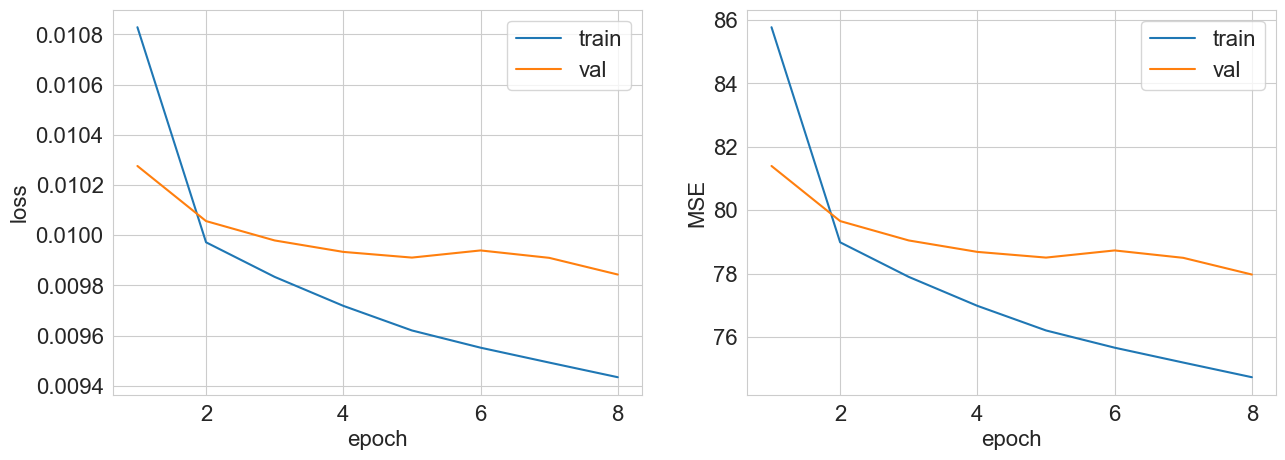

Validation MSE: 77.969


(74.72731989210655, 77.9687227031046)

In [41]:
num_epochs = 8

train_and_validate(
    net,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=1
)

Adam быстрее сходится и имеет лучшее качество (77,969) среди всех моделей. При этом SGD+momentum более стабильный (нет скачков метрики на 5-9 эпохах).

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

**Размерность скрытого слоя x2**

In [65]:
net = Net(num_features=n_features, num_classes=n_classes, num_hidden=256).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
metric = mse_denormalized

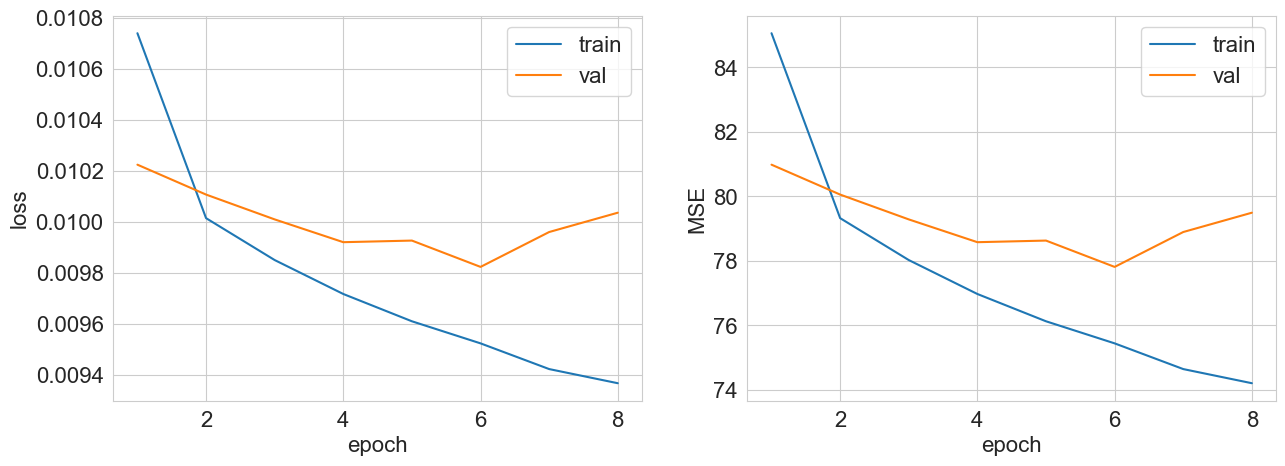

Validation MSE: 79.490


(74.19733393937572, 79.49022213624376)

In [66]:
num_epochs = 8

train_and_validate(
    net, 
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=1
)

**Добавляем еще один скрытый слой**

In [57]:
class NetAddHidden(nn.Module):
    def __init__(self, num_features=90, num_classes=100, nums_hidden_list=[128, 128]):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(num_features, nums_hidden_list[0]),
            nn.ReLU(),
            nn.Linear(nums_hidden_list[0], nums_hidden_list[1]),
            nn.ReLU(),
            nn.Linear(nums_hidden_list[1], num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [58]:
net = NetAddHidden(num_features=n_features, num_classes=n_classes).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
metric = mse_denormalized

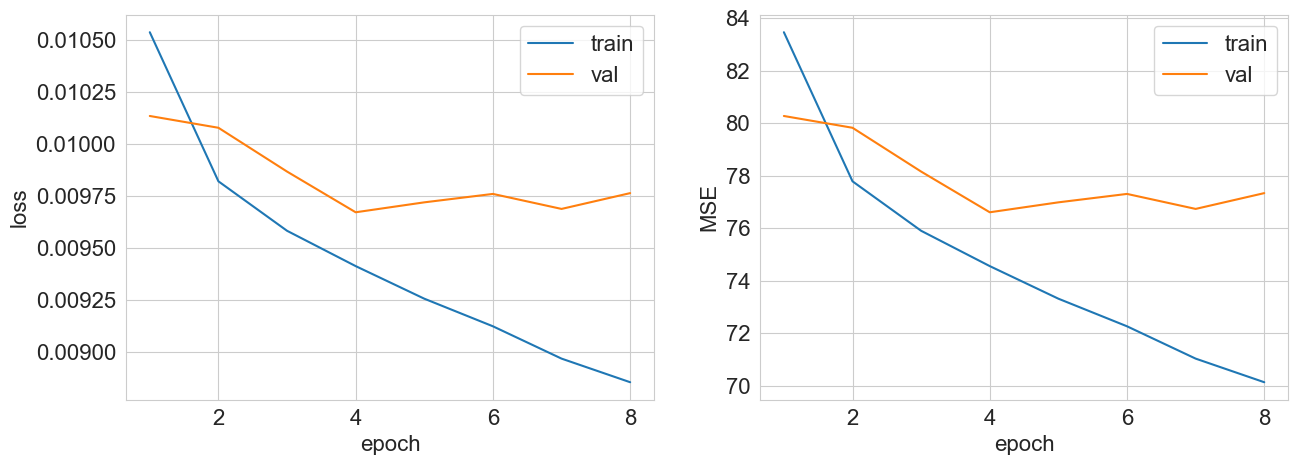

Validation MSE: 77.331


(70.12972745359431, 77.3307836796448)

In [59]:
num_epochs = 8

train_and_validate(
    net, 
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=1
)

**Размерность скрытого слоя x2 + доп. слой**

In [82]:
class NetAddHidden2(nn.Module):
    def __init__(self, num_features=90, num_classes=100, nums_hidden_list=[256, 256]):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(num_features, nums_hidden_list[0]),
            nn.ReLU(),
            nn.Linear(nums_hidden_list[0], nums_hidden_list[1]),
            nn.ReLU(),
            nn.Linear(nums_hidden_list[1], num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [83]:
net = NetAddHidden2(num_features=n_features, num_classes=n_classes).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
metric = mse_denormalized

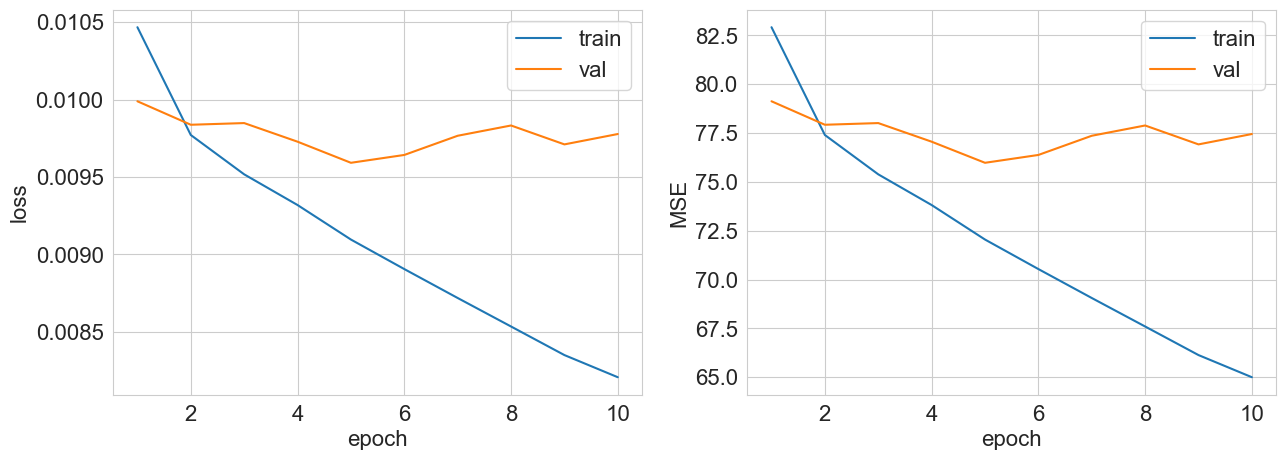

Validation MSE: 77.448


(64.9998501097864, 77.44784113678989)

In [84]:
num_epochs = 10

train_and_validate(
    net, 
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=1
)

При добавлении нейронов MSE увеличилась на ~1.5 (стало хуже), на последних эпохах метрика на валидационной выборке практически не менялась, но ошибка на обучающей продолжала уменьшаться.

При добавлении дополнительного слоя метрика MSE уменьшилась на ~0.6, на последних эпохах метрика на валидационной выборке не менялась, в то время как ошибка на обучающей выборке продолжала уменьшаться.

Это указывает на появление переобучения из-за увеличения числа параметров нейронной сети.

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем добавить в обучение регуляризацию, чтобы бороться с переобучением. Добавьте слой дропаута ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) с параметром $p=0.2$ после каждого линейного слоя, кроме последнего. Почитать про дропаут можете в следующем [блогпосте](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) или в оригинальной [статье](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Опишите результаты. 

In [97]:
class NetDropout(nn.Module):
    def __init__(self, num_features=90, num_classes=100, nums_hidden_list=[256, 256], p_dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(num_features, nums_hidden_list[0]),
            nn.Dropout(p=p_dropout),
            nn.ReLU(),
            nn.Linear(nums_hidden_list[0], nums_hidden_list[1]),
            nn.Dropout(p=p_dropout),
            nn.ReLU(),
            nn.Linear(nums_hidden_list[1], num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [98]:
net = NetDropout(num_features=n_features, num_classes=n_classes).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
metric = mse_denormalized

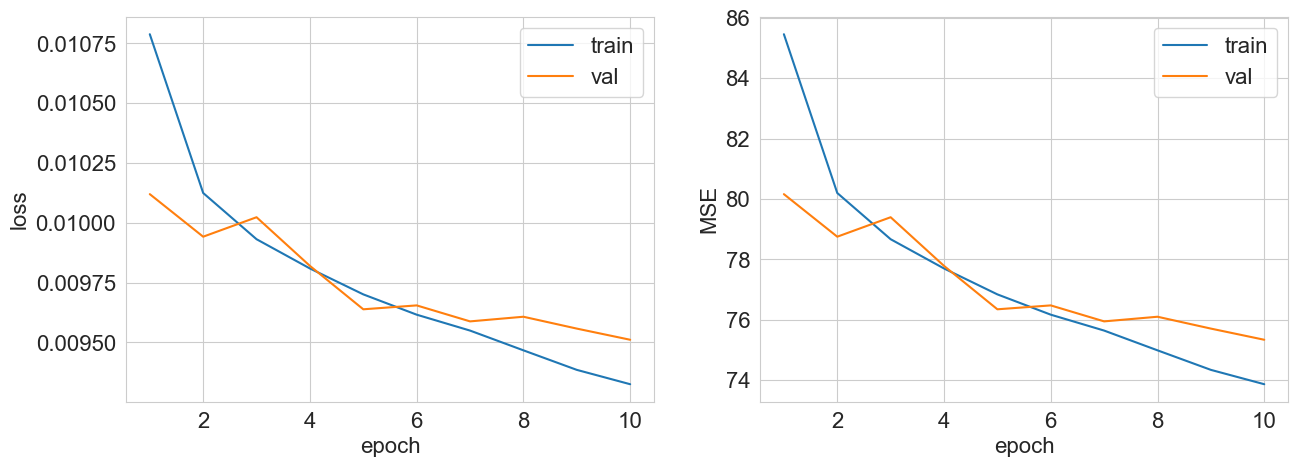

Validation MSE: 75.336


(73.86385716203695, 75.33638777061664)

In [99]:
num_epochs = 10

train_and_validate(
    net, 
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=1
)

Сильного переобучения нет, mse валидационной выборки не стала выходить на плато, а продолжала уменьшаться на более поздних эпохах, поведение на обучающей аналогично.

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`.

Также подберем оптимальное значение параметра weight decay для данного lr. Weight decay &mdash; это аналог L2-регуляризации для нейронных сетей. Почитать о нем можно, например, [здесь](https://paperswithcode.com/method/weight-decay). В PyTorch он задается как параметр оптимизатора `weight_decay`. Подберите оптимальное значение weight decay по логарифимической сетке (его типичные значения лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку).

Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [103]:
def grid_search(net, train_loader, val_loader, lrs, weight_decays, num_epochs=10):
    best_val_mse = float('inf')
    best_params = None
    results = []

    for lr in lrs:
        for wd in weight_decays:
            optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=wd)
            train_mse, val_mse = train_and_validate(
                net,
                optimizer,
                criterion,
                metric,
                train_loader,
                val_loader,
                num_epochs,
                verbose=False
            )
        
            results.append((lr, wd, train_mse, val_mse))
            print((lr, wd, train_mse, val_mse))

            if val_mse < best_val_mse:
                best_val_mse = val_mse
                best_params = (lr, wd)

    return results, best_params

In [105]:
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
weight_decays = [0, 1e-6, 1e-5, 1e-4, 1e-3]

net = NetDropout(num_features=n_features, num_classes=n_classes).to(device)

results, best_params = grid_search(net, train_loader, val_loader, learning_rates, weight_decays)

(1e-06, 0, 98.15546676734333, 95.56059832459782)
(1e-06, 1e-06, 92.03416237831165, 89.43518428499887)
(1e-06, 1e-05, 89.25075978237697, 86.75546009608881)
(1e-06, 0.0001, 87.14870087314424, 85.23701747210636)
(1e-06, 0.001, 87.48659741956357, 86.40940221233622)
(1e-05, 0, 78.42101332463126, 78.32398174840603)
(1e-05, 1e-06, 75.98152677627134, 76.81746682843686)
(1e-05, 1e-05, 74.52217149498777, 76.02690443285503)
(1e-05, 0.0001, 74.81904153850402, 76.43658656569241)
(1e-05, 0.001, 82.12139791207646, 82.63494066452002)
(0.0001, 0, 74.16503683332851, 75.71555716832499)
(0.0001, 1e-06, 71.57299093507763, 75.0555846096362)
(0.0001, 1e-05, 69.36272584846988, 74.25632069515946)
(0.0001, 0.0001, 75.13432829441746, 76.55695689986969)
(0.0001, 0.001, 83.60084888245949, 84.06091215728274)
(0.001, 0, 73.9003655570458, 75.92339772898889)
(0.001, 1e-06, 73.39351279876018, 75.53933793210183)
(0.001, 1e-05, 79.33980831528511, 79.72948526668685)
(0.001, 0.0001, 83.80814889372, 85.47113740136128)
(0.00

In [106]:
print(f"Лучший lr: {best_params[0]}, Лучший wd: {best_params[1]}")

Лучший lr: 0.0001, Лучший wd: 1e-05


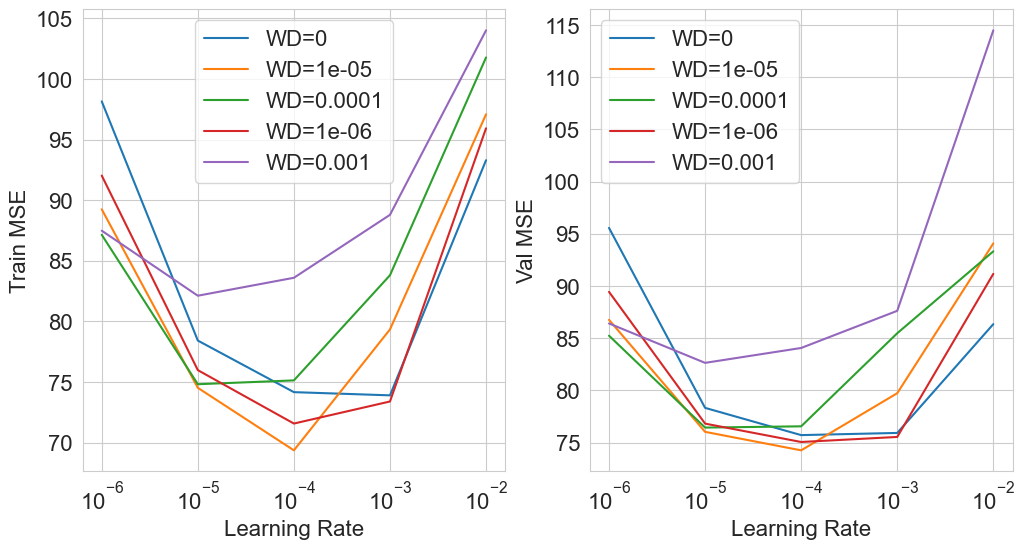

In [107]:
lrs, wds, train_mses, val_mses = zip(*results)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for wd in set(wds):
    indexes = [i for i in range(len(wds)) if wds[i] == wd]
    plt.plot([lrs[i] for i in indexes], [train_mses[i] for i in indexes], label=f'WD={wd}')
plt.xlabel('Learning Rate')
plt.ylabel('Train MSE')
plt.xscale('log')
plt.legend()

plt.subplot(1, 2, 2)
for wd in set(wds):
    indexes = [i for i in range(len(wds)) if wds[i] == wd]
    plt.plot([lrs[i] for i in indexes], [val_mses[i] for i in indexes], label=f'WD={wd}')
plt.xlabel('Learning Rate')
plt.ylabel('Val MSE')
plt.xscale('log')
plt.legend()

plt.show()

Наихудший показатель у wd = lr = 0,001. По графику можно также заметить, что минимум mse достигается у оранжевой линии (wd=1e-05) с lr, равным 1e-04. Далее будем использовать именно эти параметры.

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

In [189]:
# Заменим отображение val на test
def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    '''
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    '''
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()

            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Test {epoch}/{num_epochs}') \
            if verbose else val_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            with torch.no_grad():
                
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)

                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)
    
    if verbose:
        print(f'Test MSE: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    '''
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    '''
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='test')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='test')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


In [194]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

# Будем обучать на полных данных и оценивать на тесте
y_train_norm = normalize(y_train)
y_test_norm = normalize(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
class NetDropout(nn.Module):
    def __init__(self, num_features=90, num_classes=100, nums_hidden_list=[256, 256], p_dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(num_features, nums_hidden_list[0]),
            nn.Dropout(p=p_dropout),
            nn.ReLU(),
            nn.Linear(nums_hidden_list[0], nums_hidden_list[1]),
            nn.Dropout(p=p_dropout),
            nn.ReLU(),
            nn.Linear(nums_hidden_list[1], num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [196]:
# Функция для денормализации данных для получения правильного mse
def mse_denormalized(output, target):
    output_denorm = denormalize(output.detach().cpu().numpy())
    target_denorm = denormalize(target.detach().cpu().numpy())

    return np.mean((output_denorm - target_denorm) ** 2)

In [197]:
n_classes = 1
n_features = X_train.shape[1]
batch_size = 32

train_data = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                           torch.tensor(y_train_norm.reshape(-1, 1), dtype=torch.float32))
test_data = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                         torch.tensor(y_test_norm.reshape(-1, 1), dtype=torch.float32))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, pin_memory=True)

In [198]:
# Инициализация модели
net = NetDropout(num_features=n_features, num_classes=n_classes).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=best_params[0], weight_decay=best_params[1])
metric = mse_denormalized

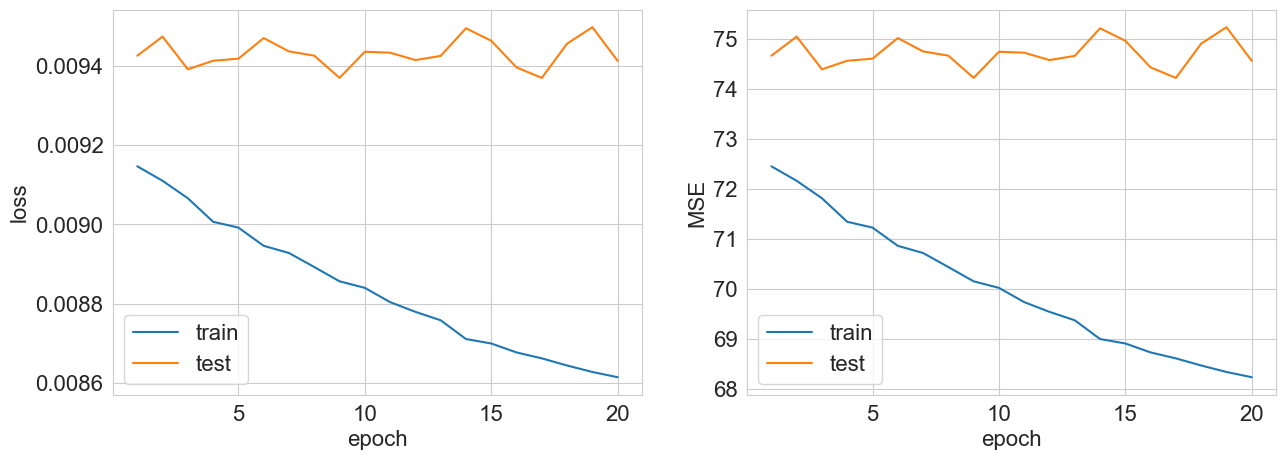

Test MSE: 74.557


(68.2346000076247, 74.55713689074177)

In [200]:
# Обучение
num_epochs = 20

train_and_validate(
    net, 
    optimizer,
    criterion,
    metric,
    train_loader,
    test_loader,
    num_epochs,
    verbose=1
)

**Сравнение с бейзлайнами**  
Как видим, побить бейзлан на финальном этапе удалось на ≈ 17% (mse нейронки = 74,56 и mse ridge = 89,75). При этом, чтобы получить результат не хуже или даже немного лучше, чем ridge-регерссия, необходимо как минимум нормализовать признаки и целевую переменную, подобрать правильные гиперпараметры, добавить несколько слоев в нейронную сеть и увеличить некоторые параметры модели.